Import the package and some example data:

In [15]:
import texpro as tp
import seaborn as sns

iris = sns.load_dataset('iris')

Initialise the TeXpro document directory:

In [16]:
tp.config.doc_path = './'
tp.config.make_folders()

Let’s take a first look at the data and save the graph for use in LaTeX:

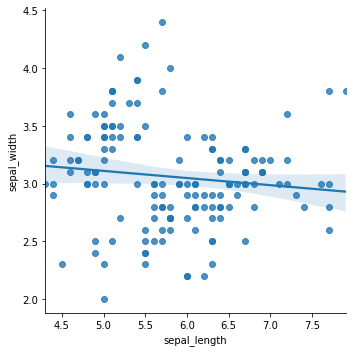

In [3]:
plot = tp.Plot(sns.lmplot(x='sepal_length', y='sepal_width', data=iris))
tp.TexFigure('sepal_plot', plot, caption='Sepal Plot')

Looks like there is a relationship between sepal length and width.  Let’s test the relationship more formally using the following regression model:

In [4]:
tp.TexEquation('sepal_reg', r'sepal\_width_i = \alpha_i + \beta_i sepal\_length_i + \epsilon_i')

In [5]:
import statsmodels.formula.api as smf
est1 = smf.ols('sepal_width ~ 1 + sepal_length', iris).fit()

from stargazer.stargazer import Stargazer
tp.StargazerTable('sepal_reg', Stargazer([est1]), caption='Sepal regression', formatting=r'\centering\tiny')

What is a sepal anyway?

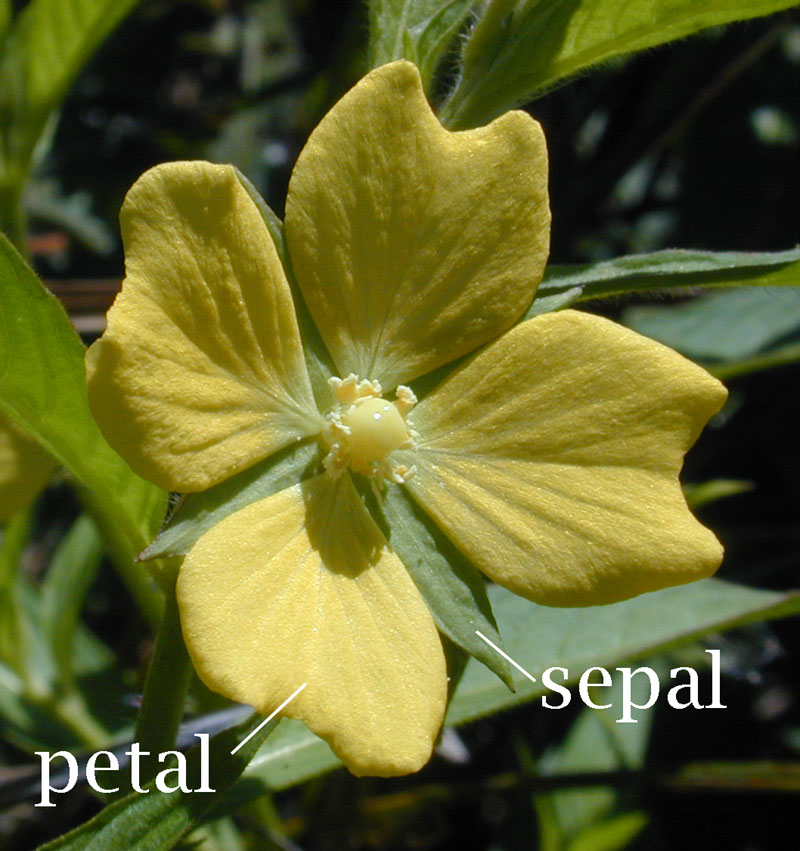

In [6]:
img = tp.Image(url='https://upload.wikimedia.org/wikipedia/commons/7/78/Petal-sepal.jpg')
tp.TexFigure('sepal_info', img, caption='What is a sepal?')

TeXpro has automatically created all the LaTeX and source files and placed them in sensible folders:

In [7]:
print(tp.config.file_tree)

.
├── eq
│   └── sepal_reg.tex
├── fig
│   ├── sepal_info.tex
│   └── sepal_plot.tex
├── img
│   ├── sepal_info.jpeg
│   └── sepal_plot.pdf
├── tab
│   └── sepal_reg.tex
├── texpro_demo.ipynb
└── texpro_demo.tex


# LeTeX code

In [4]:
from pathlib import Path
print(Path('texpro_demo.tex').read_text())

\documentclass[a4paper,twocolumn]{article}
\usepackage{graphicx,cleveref}

\begin{document}

We want to know something about sepals, shown in \cref{fig:sepal_info}. Our data is shown in \cref{fig:sepal_plot}.
\input{fig/sepal_info.tex}
\input{fig/sepal_plot.tex}

Let’s analyse it formally using the following regression:
\input{eq/sepal_reg.tex}

The results of the regression given by \cref{eq:sepal_reg} are summarised in \cref{tab:sepal_reg}.
\input{tab/sepal_reg.tex}

\end{document}


Build

In [12]:
!mkdir -p .tex-build && xelatex -synctex=1 -interaction=nonstopmode -output-directory=.tex-build  texpro_demo.tex && xelatex -synctex=1 -interaction=nonstopmode -output-directory=.tex-build  texpro_demo.tex

This is XeTeX, Version 3.14159265-2.6-0.999991 (TeX Live 2019/Debian) (preloaded format=xelatex)
 restricted \write18 enabled.
entering extended mode
(./texpro_demo.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/graphics/graphicx.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/latex/graphics/graphics.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/trig.sty)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/graphics.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-def/xetex.def)))
(/usr/share/texlive/texmf-dist/tex/latex/cleveref/cleveref.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-xdvipdfmx.def)
(.tex-build/texpro_demo.aux)
(/usr/share/texlive/te

Convert to image

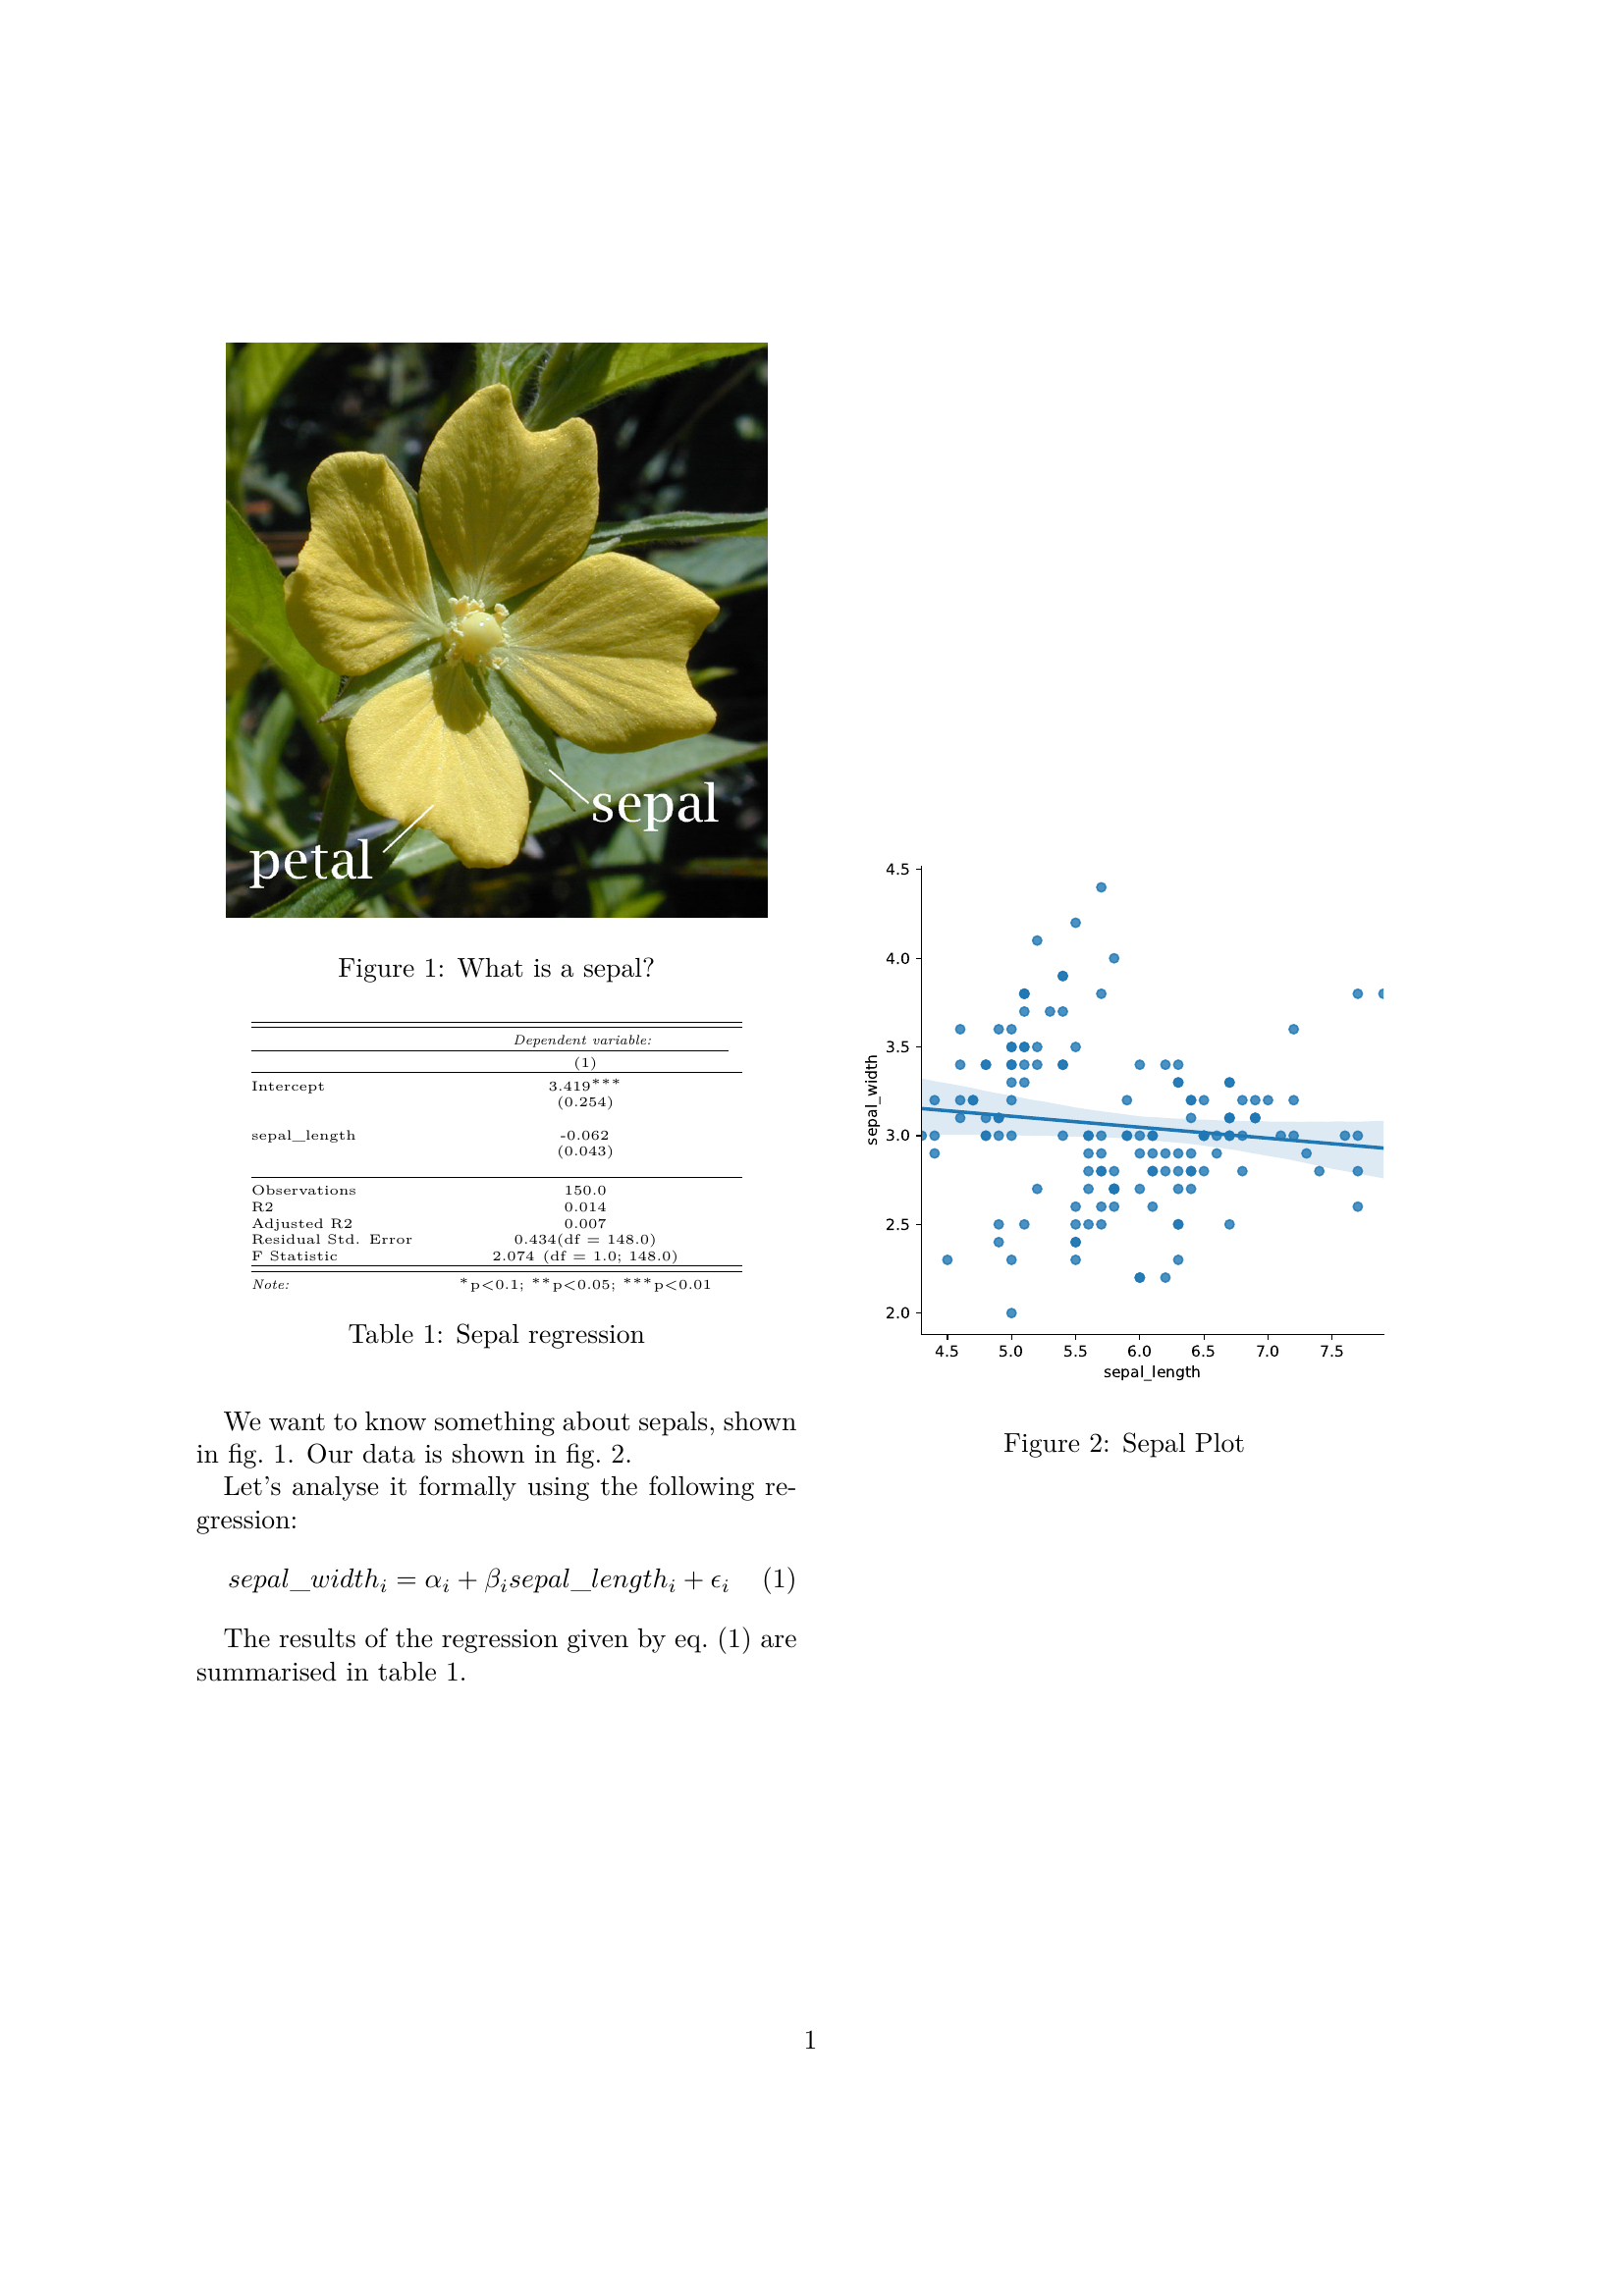

In [26]:
from pdf2image import convert_from_path
img = convert_from_path(Path('.tex-build/texpro_demo.pdf'))[0]
import io
img.save('texpro_demo.png')
tp.Image('texpro_demo', extension='png', folder='.')